In [196]:
# Импорт библиотек
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [197]:
# Импорт данных по индексу
SnP_500 = yf.download("^GSPC", start="2011-10-01", end="2021-11-23", interval='1mo') 
# Импорт данных по компаниям
MMM = yf.download("MMM", start="2011-10-01", end="2021-11-23", interval='1mo')
AAP = yf.download("AAP", start="2011-10-01", end="2021-11-23", interval='1mo')
ABBV = yf.download("ABBV", start="2011-10-01", end="2021-11-23", interval='1mo')
AMBT = yf.download("AMBT", start="2011-10-01", end="2021-11-23", interval='1mo')
ABT = yf.download("ABT", start="2011-10-01", end="2021-11-23", interval='1mo')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [198]:
# Убираем строки со значением NaN
SnP_500 = SnP_500.dropna(axis='index', how='any')
MMM = MMM.dropna(axis='index', how='any')
AAP = AAP.dropna(axis='index', how='any')
ABBV = ABBV.dropna(axis='index', how='any')
AMBT = AMBT.dropna(axis='index', how='any')
ABT = ABT.dropna(axis='index', how='any')

In [199]:
# Перерасчёт данных из месячных в квартальные
SnP_500_q = SnP_500.resample("3M").mean() 
MMM_q = MMM.resample("3M").mean()
AAP_q = AAP.resample("3M").mean()
ABBV_q = ABBV.resample("3M").mean()
AMBT_q = AMBT.resample("3M").mean()
ABT_q = ABT.resample("3M").mean() 

In [200]:
SnP_500_q['Dynamics'] = SnP_500_q.Close.pct_change().mul(100).round(2) # Вычисляем динамику роста
MMM_q['Dynamics'] = MMM_q.Close.pct_change().mul(100).round(2) # Вычисляем динамику роста
AAP_q['Dynamics'] = AAP_q.Close.pct_change().mul(100).round(2) # Вычисляем динамику роста
ABBV_q['Dynamics'] = ABBV_q.Close.pct_change().mul(100).round(2) # Вычисляем динамику роста
AMBT_q['Dynamics'] = AMBT_q.Close.pct_change().mul(100).round(2) # Вычисляем динамику роста
ABT_q['Dynamics'] = ABT_q.Close.pct_change().mul(100).round(2) # Вычисляем динамику роста

# График
В текущем формате график отображает изменение квартального значения доходности инструментов между собой

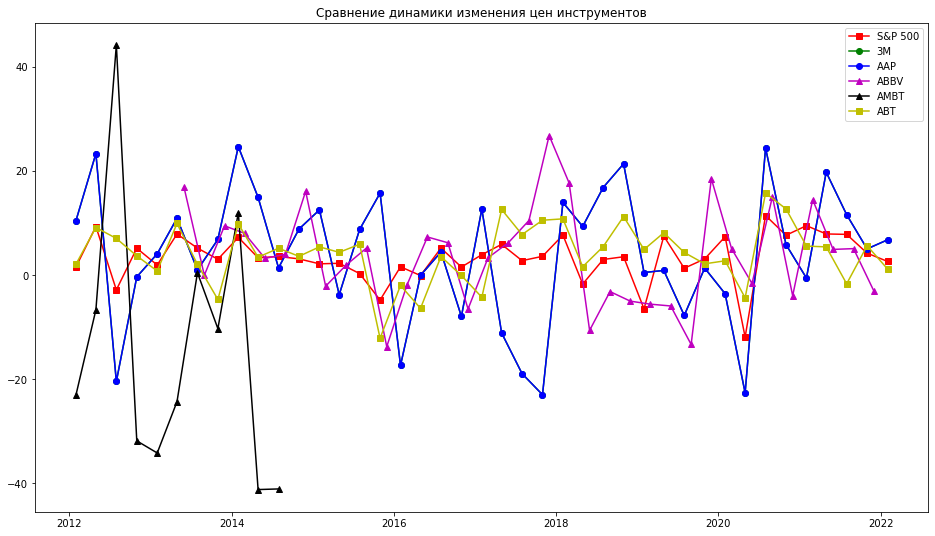

In [202]:
# Диапазон движения по оси Х
x_SnP_500_q = np.arange(0, SnP_500_q.size) 
x_MMM_q = np.arange(0, MMM_q.size)
x_AAP_q = np.arange(0, AAP_q.size)
x_ABBV_q = np.arange(0, ABBV_q.size)
x_AMBT_q = np.arange(0, AMBT_q.size)
x_ABT_q = np.arange(0, ABT_q.size)

# Размер графика на экране
plt.figure(figsize=(16,9))

# параметры графика
plt.plot(SnP_500_q.index, SnP_500_q['Dynamics'], 's-r')
plt.plot(MMM_q.index, AAP_q['Dynamics'], 'o-g')
plt.plot(AAP_q.index, AAP_q['Dynamics'], 'o-b')
plt.plot(ABBV_q.index, ABBV_q['Dynamics'], '^-m')
plt.plot(AMBT_q.index, AMBT_q['Dynamics'], '^-k')
plt.plot(ABT_q.index, ABT_q['Dynamics'], 's-y')

# легенда графика
plt.legend(['S&P 500', '3M' ,'AAP', 'ABBV', 'AMBT', 'ABT'])

# заголовок графика
plt.title('Сравнение динамики изменения цен инструментов')

# вывод графика на экран
plt.show()